---
<h1 align="center"><span style='font-family:Georgia'> Replicate NLinear on the Four ETDataset </span></h1>
    
---

The NLinear model is a variant of the LTSF-Linear model that is designed to boost performance when there is a distribution shift in the dataset. It first subtracts the input by the last value of the sequence, then the input goes through a linear layer, and the subtracted part is added back before making the final prediction. The subtraction and addition in NLinear are a simple normalization for the input sequence.


- The *Vanilla Linear* model is a simple baseline model that directly regresses historical time series for future prediction via a weighted sum operation.

<img width="500" src="https://raw.githubusercontent.com/cure-lab/ltsf-linear/master/pics/Linear.png" alt="Vanilla Linear model" />

---
## Inputs and Outputs
---
##### **Input sequence:**
The input to the Informer model is a time series sequence of fixed length. The sequence contains a set of features, where each feature corresponds to a value measured at a specific time step in the sequence. 
- The length of the input sequence is defined by the `seq_len` hyperparameter.

##### **Output sequence:**

The output of the Informer model is a time series sequence of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence. 
- The length of the output sequence is defined by the `pred_len` hyperparameter.

---
## Methodology
---
This notebook provide a step-by-step guide for replicating the **NLinear** model and training it on the ETDataset (ETTh1, ETTh2, ETTm1, and ETTm2), ensuring accurate reproduction of the models by comparing the notebook results with the official paper results. The main foucs here is to study the *impact of number of prediction length on the performance*. The workflow from the beginning to forcasting is as follows:

### 1.	Data Preprocessing
The input sequence is normalized by subtracting the last value of the sequence. This step is performed to account for any distribution shift in the data.
$$Xnorm = x - x[-1]$$
### 2.	Linear layer
Transform the input features into output features by performing matrix multiplication between the input and a weight matrix.
$$y = wx + b$$

### 3.	Residual connection
The output of the linear layer is added to the initial normalized input sequence before making the final prediction.
$$Y = y+ x[-1]$$



---
## Hyperparameters
---

**Here are the hyperparameters that control the input and output:**

| Parameter | Description | Value |
|---|---|---|
| `args.data` | The name of the dataset to use. | 'ETTh1', 'ETTh2', 'ETTm1', and 'ETTm2'|
| `args.root_path` | The root path of the data file. | `./Datasets/` |
| `args.features` | The type of forecasting task to perform. The options are 'M' (multivariate predict multivariate), 'S' (univariate predict univariate), and 'MS' (multivariate predict univariate). | 'M'|
| `args.target` | The target feature to predict in a univariate or multivariate task. ('HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT')| 'OT' |
| `args.seq_len` | The length of the input sequence to the Informer encoder. | 336|
| `args.pred_len` | The length of the future sequence to be predicted. | [96, 192, 336, 720]|
| `args.padding` | The amount of padding to add to the input sequence, if any. | 0|
| `args.freq` |  | 'h' |
<!-- | `args.embed` | The type of time feature encoding to use. The options are 'timeF' (time features encoding), 'fixed' (fixed positional encoding), and 'learned' (learned positional encoding). | 'timeF' | -->

---------

**The following are the experiment Hyperparameters.**

| Parameter | Description | Value |
|---|---|---|
| `args.train_only` | Whether to train the model or fine-tune | True |
| `args.train_epochs` | The number of epochs to train for. | 20 |
| `args.batch_size` | The batch size of training input data. | 16 |
| `args.learning_rate` | Learning rate starts from 1e−4, decaying two times smaller every epoch. | 0.005 |
| `args.lradj` | Learning rate decayed two times smaller every epoch. | 'type1' |
| `args.loss` | Evaluating criteria | `'mse'` |
| `args.patience` | The number of epochs to wait before early stopping. | 3 |
| `args.des` | The description of the experiment. | 'Exp' |
| `args.itr` | The iteration of the experiment. | 1 |
| `args.model` | The model name | 'NLinear' |
| `args.checkpoints` | Location of model checkpoints | `'./Checkpoints/NLinear_checkpoints'` |


<!-- ##### **Input sequence:**
The input to the NLinear model is a time series sequence of fixed length. The sequence contains a set of features, where each feature corresponds to a value measured at a specific time step in the sequence. 
- The length of the input sequence is defined by the `seq_len` hyperparameter.

##### **Output sequence:**

The output of the Informer model is a time series sequence of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence. 
- The length of the output sequence is defined by the `pred_len` hyperparameter.

##### **Here are the hyperparameters that control the input and output:**

| Parameter | Description | Value |
|---|---|---|
| `args.data` | The name of the dataset to use. | 'ETTh1', 'ETTh2', 'ETTm1', and 'ETTm2'|
| `args.root_path` | The root path of the data file. | `./Datasets/` |
| `args.features` | The type of forecasting task to perform. The options are 'M' (multivariate predict multivariate), 'S' (univariate predict univariate), and 'MS' (multivariate predict univariate). | 'M'|
| `args.target` | The target feature to predict in a univariate or multivariate task. ('HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT')| 'OT' |
| `args.seq_len` | The length of the input sequence to the Informer encoder. | 336|
| `args.pred_len` | The length of the future sequence to be predicted. | [96, 192, 336, 720]|
| `args.freq` |  | 'h' | -->

---
# Setup
---

Installs the necessary libraries and dependencies required to run the code in the notebook.

**Clone the repository from github**

In [1]:
# !git clone https://github.com/debi2023-group3/Time-Series-Forcasting-Group3.git

**Add project_files to system path**

In [2]:
import sys
if not 'Time-Series-Forcasting-Group3' in sys.path:
    sys.path += ['Time-Series-Forcasting-Group3']
    
sys.path

['/home/jovyan/new_mohamed/Final-Time-Series-Forecasting',
 '/opt/conda/lib/python39.zip',
 '/opt/conda/lib/python3.9',
 '/opt/conda/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/lib/python3.9/site-packages',
 'Time-Series-Forcasting-Group3']

**Important library**

In [9]:
import os
import random
import torch
import numpy as np

from exp.exp_NLinear import Exp_Main 

In [10]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [11]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
    
"""
    **dotdict function**
    This function is used to convert a dictionary into
    an object whose keys can be accessed as attributes
"""

args = dotdict()

**GPU Device Hyperparameters**

In [12]:
######################### Device Hyperparameters  ##########################
args.use_multi_gpu = False
args.num_workers = 0
args.use_gpu = torch.cuda.is_available() 
args.gpu = 0                           # The index of the GPU to use.

**Dataset Hyperparameters**

In [13]:
######################### Dataset Hyperparameters  ##########################
args.data = 'ETTh1'            # dataset name
args.root_path = './Datasets/' # root path of data file
args.data_path = 'ETTh1.csv'   # data file
args.features = 'M'            # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT'             # target feature in S or MS task
args.freq = 'h'                # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.embed = 'timeF'           # time features (date) encoding, options:[timeF, fixed, learned]
args.padding = 0               # the amount of padding to add to the input sequence of the Informer model

**Experiment Hyperparameters**



In [14]:
######################### Experiment Hyperparameters  ##########################

# args.output_attention = False # whether to output attention in ecoder
args.train_only = True
args.train_epochs = 20        # The number of epochs to train for.
args.batch_size = 16          # The batch size of training input data.
args.learning_rate = 0.005    # learning rate starts from 1e−4, decaying two times smaller every epoch.
args.lradj = 'type1'          # learning rate decayed two times smaller every epoch.
args.loss = 'mse'             # evaluating criteria
args.patience = 3             # The number of epochs to wait before early stopping.
args.des = 'Exp'              # The description of the experiment.
args.itr  = 1

args.model = 'NLinear' 
args.checkpoints = './Checkpoints/NLinear_checkpoints' # location of model checkpoints

**Modeling Hyperparameters**

In [15]:
args.enc_in = 7 
args.label_len = 48
args.seq_len = 336              # input sequence length of DLinear encoder
args.pred_len = 96              # prediction sequence length

---
# Working on ETTh1 Dataset
---

## Trail 1: NLinear, Dataset:ETTh1,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [17]:
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [18]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.3271977 (MSE)
    Speed: 0.1759 sec/iter 
    Left time: 1787.0778 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.4029537 (MSE)
    Speed: 0.1130 sec/iter 
    Left time: 1137.3377 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.3068514 (MSE)
    Speed: 0.1149 sec/iter 
    Left time: 1144.4636 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

In [19]:
exp.test(setting)
torch.cuda.empty_cache()

test 2785
mae:0.39179423451423645, mse:0.37049049139022827, rmse:0.6086792945861816, mape:9.38114070892334, mspe:38078.4765625


---
## Trail 2: NLinear, Dataset:ETTh1 , Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [20]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [21]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.4871284 (MSE)
    Speed: 0.1201 sec/iter 
    Left time: 1205.5919 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.4229207 (MSE)
    Speed: 0.1379 sec/iter 
    Left time: 1371.1625 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.4568426 (MSE)
    Speed: 0.1201 sec/iter 
    Left time: 1181.8311 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

In [22]:
exp.test(setting)
torch.cuda.empty_cache()

test 2689
mae:0.41151052713394165, mse:0.4037800133228302, rmse:0.6354368925094604, mape:9.237823486328125, mspe:35685.97265625


---
## Trail 3: NLinear, Dataset:ETTh1,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [23]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [24]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.6754125 (MSE)
    Speed: 0.3009 sec/iter 
    Left time: 2967.5514 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.4577432 (MSE)
    Speed: 0.1750 sec/iter 
    Left time: 1708.3579 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.5936508 (MSE)
    Speed: 0.2069 sec/iter 
    Left time: 1999.2450 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

In [25]:
exp.test(setting)
torch.cuda.empty_cache()

test 2545
mae:0.4264957904815674, mse:0.42810434103012085, rmse:0.6542968153953552, mape:9.137393951416016, mspe:34680.34375


---
## Trail 4: NLinear, Dataset:ETTh1,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [26]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [27]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.6145326 (MSE)
    Speed: 0.2489 sec/iter 
    Left time: 2335.2900 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.5763394 (MSE)
    Speed: 0.2601 sec/iter 
    Left time: 2413.6197 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.5860156 (MSE)
    Speed: 0.4049 sec/iter 
    Left time: 3717.7525 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

In [28]:
exp.test(setting)
torch.cuda.empty_cache()

test 2161
mae:0.45103150606155396, mse:0.43515780568122864, rmse:0.6596649289131165, mape:9.38576602935791, mspe:36136.421875


### Conclusion



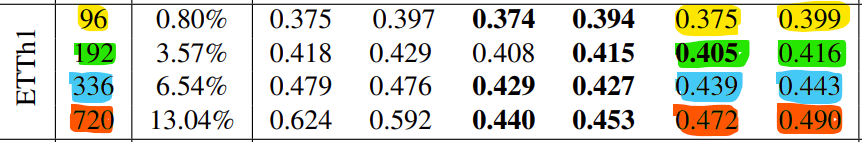

In [65]:
from IPython.display import Image
Image(filename=r"./Images/NLinear Results ETTh1.png")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| Seq_len | MSE | MAE |
|---|---|---|
| 96 | 0.37049049139022827 | 0.39179423451423645 |
| 192 | 0.4037800133228302 | 0.41151052713394165 |
| 336 | 0.42810434103012085 | 0.8656408190727234 |
| 720 | 0.43515780568122864 | 0.45103150606155396 |


---
# Working on ETTh2 Dataset
---

## Trail 1: NLinear, Dataset:ETTh2,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [29]:
args.data_path = 'ETTh2.csv' # data file
args.data = 'ETTh2'  # data
args.pred_len=96

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [30]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.6235656 (MSE)
    Speed: 0.1357 sec/iter 
    Left time: 1378.4691 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.3871790 (MSE)
    Speed: 0.1410 sec/iter 
    Left time: 1418.6136 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.7072984 (MSE)
    Speed: 0.1351 sec/iter 
    Left time: 1345.2487 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

In [31]:
exp.test(setting)
torch.cuda.empty_cache()

test 2785
mae:0.33683285117149353, mse:0.27411508560180664, rmse:0.5235599875450134, mape:1.376336693763733, mspe:337.57940673828125


---
## Trail 2: NLinear, Dataset: ETTh2, Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [32]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [33]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.4211823 (MSE)
    Speed: 0.1681 sec/iter 
    Left time: 1687.4321 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 1.5514312 (MSE)
    Speed: 0.1390 sec/iter 
    Left time: 1381.6763 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.8605552 (MSE)
    Speed: 0.1619 sec/iter 
    Left time: 1593.5217 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
----------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

In [34]:
exp.test(setting)
torch.cuda.empty_cache()

test 2689
mae:0.3775687515735626, mse:0.3357963263988495, rmse:0.5794793367385864, mape:1.499432921409607, mspe:344.9421081542969


---
## Trail 3: NLinear, Dataset:ETTh2,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [35]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [36]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.8460404 (MSE)
    Speed: 0.0430 sec/iter 
    Left time: 423.5842 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.5878583 (MSE)
    Speed: 0.0401 sec/iter 
    Left time: 391.0836 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 1.4178981 (MSE)
    Speed: 0.0289 sec/iter 
    Left time: 279.5291 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
-------------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

In [37]:
exp.test(setting)
torch.cuda.empty_cache()

test 2545
mae:0.4017118811607361, mse:0.36035478115081787, rmse:0.6002956032752991, mape:1.69881272315979, mspe:434.211181640625


---
## Trail 4: NLinear, Dataset:ETTh2,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [38]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [39]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 1.1199789 (MSE)
    Speed: 0.0470 sec/iter 
    Left time: 440.7063 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 1.6304041 (MSE)
    Speed: 0.0880 sec/iter 
    Left time: 816.4561 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.7180045 (MSE)
    Speed: 0.0530 sec/iter 
    Left time: 486.6900 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
-------------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

In [40]:
exp.test(setting)
torch.cuda.empty_cache()

test 2161
mae:0.43608567118644714, mse:0.39491400122642517, rmse:0.6284218430519104, mape:2.0920989513397217, mspe:671.3483276367188


---
# Working on ETTm1 Dataset
---

## Trail 1: NLinear, Dataset:ETTm1,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [41]:
args.pred_len=96
args.data_path = 'ETTm1.csv' # data file
args.data = 'ETTm1'  # data

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [42]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.3079511 (MSE)
    Speed: 0.0578 sec/iter 
    Left time: 2461.8020 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.4299910 (MSE)
    Speed: 0.0700 sec/iter 
    Left time: 2971.2280 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.4324728 (MSE)
    Speed: 0.0571 sec/iter 
    Left time: 2416.7191 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

In [43]:
exp.test(setting)
torch.cuda.empty_cache()

test 11425
mae:0.3426702618598938, mse:0.30057841539382935, rmse:0.5482503175735474, mape:2.096381187438965, mspe:329.1745300292969


---
## Trail 2: NLinear,Dataset:ETTm1 , Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [44]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [45]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.3447856 (MSE)
    Speed: 0.1160 sec/iter 
    Left time: 4923.3759 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.3650349 (MSE)
    Speed: 0.1209 sec/iter 
    Left time: 5117.7879 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.3219461 (MSE)
    Speed: 0.1170 sec/iter 
    Left time: 4941.9662 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

In [46]:
exp.test(setting)
torch.cuda.empty_cache()

test 11329
mae:0.3634703755378723, mse:0.3357192575931549, rmse:0.5794128775596619, mape:2.1939055919647217, mspe:362.60888671875


---
## Trail 3: NLinear, Dataset:ETTm1,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [47]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [48]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.3064145 (MSE)
    Speed: 0.1449 sec/iter 
    Left time: 6123.6112 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.2727180 (MSE)
    Speed: 0.1529 sec/iter 
    Left time: 6446.2166 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.4277291 (MSE)
    Speed: 0.1301 sec/iter 
    Left time: 5472.0321 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

In [49]:
exp.test(setting)
torch.cuda.empty_cache()

test 11185
mae:0.38339754939079285, mse:0.37040412425994873, rmse:0.6086083650588989, mape:2.276810646057129, mspe:388.31500244140625


---
## Trail 4: NLinear, Dataset:ETTm1,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [50]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [51]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.5188709 (MSE)
    Speed: 0.3430 sec/iter 
    Left time: 14331.9666 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.4236422 (MSE)
    Speed: 0.3329 sec/iter 
    Left time: 13873.8379 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.3922663 (MSE)
    Speed: 0.3191 sec/iter 
    Left time: 13266.5269 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

In [52]:
exp.test(setting)
torch.cuda.empty_cache()

test 10801
mae:0.41576775908470154, mse:0.42637062072753906, rmse:0.6529706120491028, mape:2.4495182037353516, mspe:447.6900329589844


---
# Working on ETTm2 Dataset
---

## Trail 1: NLinear, Dataset:ETTm2,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [53]:
args.pred_len=96
args.data_path = 'ETTm2.csv' # data file
args.data = 'ETTm2'  # data

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [54]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.2534519 (MSE)
    Speed: 0.1119 sec/iter 
    Left time: 4764.0941 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.3908922 (MSE)
    Speed: 0.1209 sec/iter 
    Left time: 5132.6837 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.1694733 (MSE)
    Speed: 0.1191 sec/iter 
    Left time: 5043.9705 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

In [55]:
exp.test(setting)
torch.cuda.empty_cache()

test 11425
mae:0.2539452612400055, mse:0.1648230105638504, rmse:0.4059840142726898, mape:1.0774726867675781, mspe:224.3981475830078


---
## Trail 2: NLinear,  Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [56]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [57]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.2364882 (MSE)
    Speed: 0.1007 sec/iter 
    Left time: 4274.2634 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.7808409 (MSE)
    Speed: 0.1072 sec/iter 
    Left time: 4536.9652 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.5325431 (MSE)
    Speed: 0.1150 sec/iter 
    Left time: 4856.3424 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

In [58]:
exp.test(setting)
torch.cuda.empty_cache()

test 11329
mae:0.29132628440856934, mse:0.21995051205158234, rmse:0.4689888060092926, mape:1.2049486637115479, mspe:247.4080810546875


---
## Trail 3: NLinear, Dataset:ETTm2,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [59]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [60]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 0.3569316 (MSE)
    Speed: 0.1629 sec/iter 
    Left time: 6883.4021 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 0.3629536 (MSE)
    Speed: 0.1580 sec/iter 
    Left time: 6659.8516 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.7926423 (MSE)
    Speed: 0.1650 sec/iter 
    Left time: 6942.1033 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

In [61]:
exp.test(setting)
torch.cuda.empty_cache()

test 11185
mae:0.32648754119873047, mse:0.27361011505126953, rmse:0.5230775475502014, mape:1.3192278146743774, mspe:272.74810791015625


---
## Trail 4: NLinear, Dataset:ETTm2,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [62]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'output_attention': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 16, 'learning_rate': 0.005, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [63]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
                                   Training                               
Epoch: 1, Iters: 100
--------------------------------------------------------------------------------
    Loss : 1.3708851 (MSE)
    Speed: 0.1146 sec/iter 
    Left time: 4788.8697 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 200
--------------------------------------------------------------------------------
    Loss : 1.0702996 (MSE)
    Speed: 0.1230 sec/iter 
    Left time: 5127.5362 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 300
--------------------------------------------------------------------------------
    Loss : 0.3946671 (MSE)
    Speed: 0.1110 sec/iter 
    Left time: 4613.4468 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 400
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

In [64]:
exp.test(setting)
torch.cuda.empty_cache()

test 10801
mae:0.38334736227989197, mse:0.36760905385017395, rmse:0.6063077449798584, mape:1.4783984422683716, mspe:290.27801513671875


### Conclusion
The training process is progressing well and the `Nlinear` model is being optimized in an effective manner. 
- The loss is steadily decreasing over the epochs, which indicates the model is learning and improving. 
- The validation loss is also decreasing at each epoch, showing the model is generalizing well.
- The training speed (secs/iter) improves over time, likely due to optimizations in the model and dropout of neurons. This indicates the model is becoming more efficient as it trains.

**The key positive signs I see are:**

- Decreasing loss and validation loss
- Improving training speed over time
- Learning rate decay schedule
